Setting UP: Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

Importing the dataset

In [2]:
dataset = pd.read_csv("../input/iris-flower-dataset/IRIS.csv")

Look at the Data 

In [3]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Checking the missing value

In [5]:
dataset.isnull().count()

sepal_length    150
sepal_width     150
petal_length    150
petal_width     150
species         150
dtype: int64

Now look a the outlier, and some more statistical values

In [6]:
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
X = dataset.drop(['species'], axis=1)
Y = dataset['species']

Checking the shape

In [9]:
X.shape, Y.shape

((150, 4), (150,))

Visualizing 
1. Correlations among data

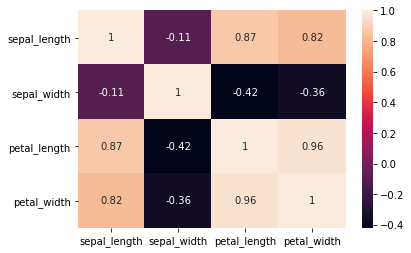

In [10]:
sns.heatmap(dataset.corr(), annot = True);
#annot = True adds the numbers onto the squares

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


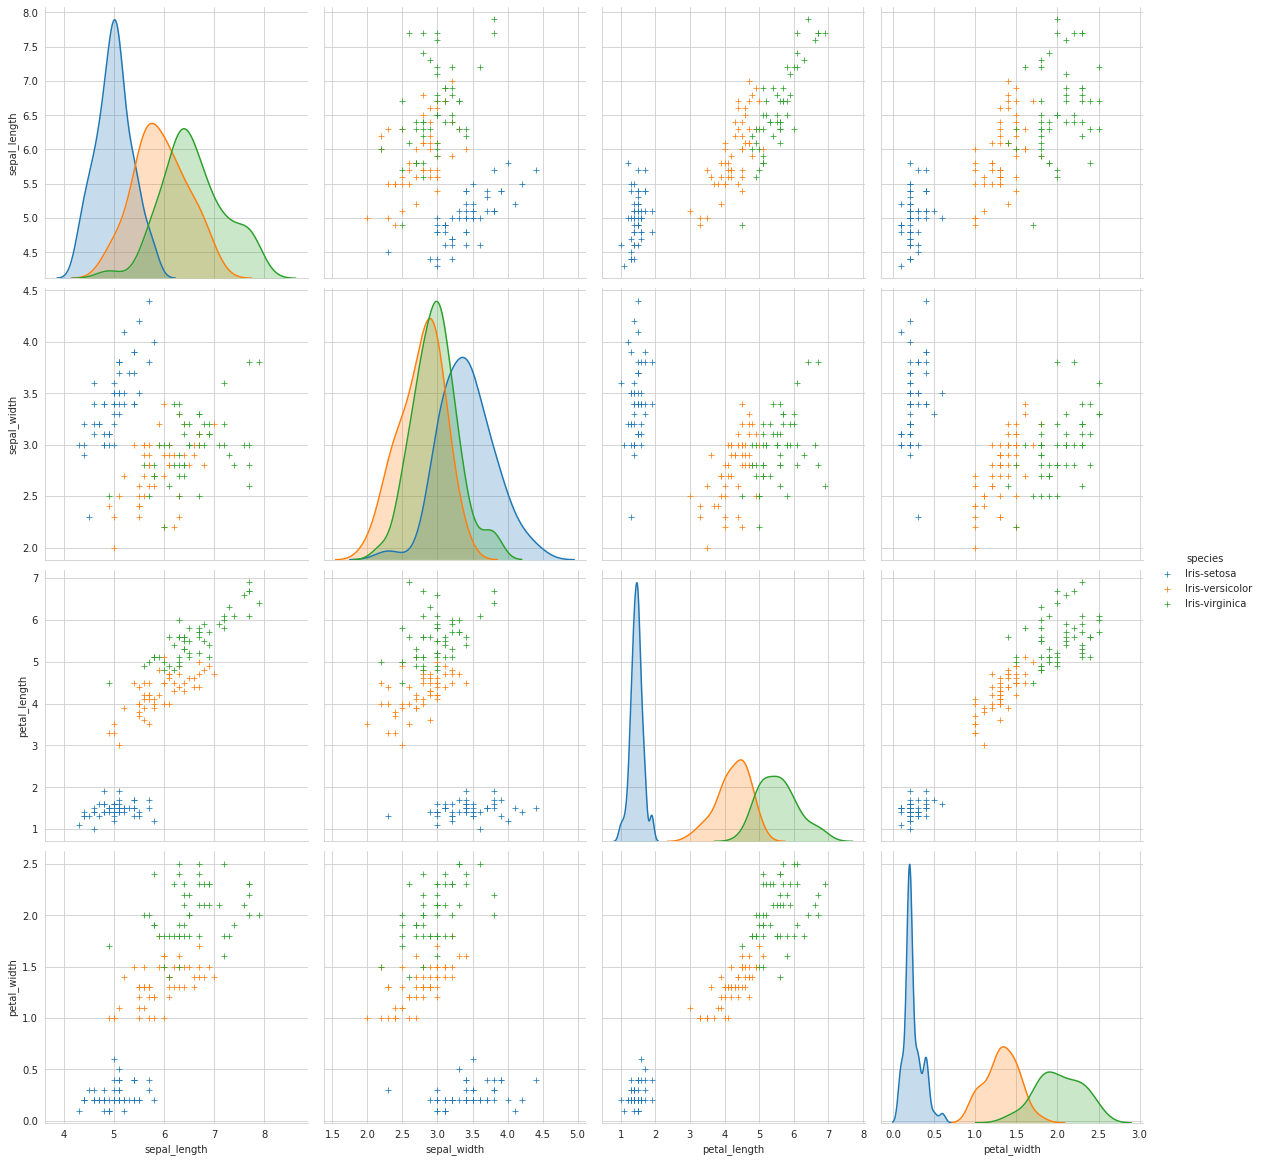

In [23]:
sns.set_style("whitegrid")
sns.pairplot(dataset, hue="species", markers='+',size=4)
plt.show()

Modeling

The dataet consits of 3 unique types of petals

In [12]:
#Splitting the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(90, 4)
(90,)
(60, 4)
(60,)


Standardize

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

baseline Predition

In [17]:
#create the model instance
model = LogisticRegression()
#fit the model on the training data
model.fit(X_train, y_train)
#the score, or accuracy of the model
model.score(X_test, y_test)

0.95

The test score is already very high, but we can use the cross validated score to ensure the model's strength 


In [18]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=10)
print(np.mean(scores))

0.9555555555555555


Coefficients


In [19]:
df_coef = pd.DataFrame(model.coef_, columns=X_train.columns)
df_coef

,sepal_length,sepal_width,petal_length,petal_width
0,-0.977733,0.897593,-1.640967,-1.514899
1,0.628958,-0.435489,-0.185807,-0.810671
2,0.348775,-0.462103,1.826774,2.325570


Prediction

In [20]:
predictions = model.predict(X_test)
#compare predicted values with the actual scores
compare_df = pd.DataFrame({'actual': y_test, 'predicted': predictions})
compare_df = compare_df.reset_index(drop = True)
compare_df

,actual,predicted
0,Iris-versicolor,Iris-versicolor
1,Iris-virginica,Iris-versicolor
2,Iris-virginica,Iris-virginica
3,Iris-setosa,Iris-setosa
4,Iris-virginica,Iris-virginica
5,Iris-versicolor,Iris-versicolor
6,Iris-setosa,Iris-setosa
7,Iris-versicolor,Iris-virginica
8,Iris-setosa,Iris-setosa
9,Iris-versicolor,Iris-versicolor


Apply K-nearest neighbour

In [29]:
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [30]:
y_pred = classifier.predict(X_test)

In [33]:
from sklearn.metrics import confusion_matrix
#Logistic Regression
pd.DataFrame(confusion_matrix(y_test, predictions))

,0,1,2
0,20,0,0
1,0,20,1
2,0,2,17


Confunsion Matrix

In [32]:
#KNN metric
pd.DataFrame(confusion_matrix(y_test, y_pred))

,0,1,2
0,20,0,0
1,0,20,1
2,0,2,17


Classification Scores

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        20
Iris-versicolor       0.91      0.95      0.93        21
 Iris-virginica       0.94      0.89      0.92        19

       accuracy                           0.95        60
      macro avg       0.95      0.95      0.95        60
   weighted avg       0.95      0.95      0.95        60



Predicting Probability

In [28]:
probs = model.predict_proba(X_test)
#put the probabilities into a dataframe for easier viewing
Y_pp = pd.DataFrame(model.predict_proba(X_test), 
             columns=['class_0_pp', 'class_1_pp', 'class_2_pp'])
Y_pp.head()

,class_0_pp,class_1_pp,class_2_pp
0,0.045837,0.899175,0.054988
1,0.002388,0.536031,0.461582
2,0.000273,0.031575,0.968152
3,0.985074,0.014925,0.000001
4,0.000032,0.011478,0.988490
